<a href="https://colab.research.google.com/github/vis-hal-k/B.Tech-Project-/blob/main/cracks_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# File upload
!cp -r  "/content/drive/MyDrive/Colab Notebooks/Internship/Patches_Image" "/content/"
test_folder = "/content/Patches_Image"

# To unzip the surface_crack-label.zip
import zipfile
zip_file = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Internship/Surface_Crack-labelzip.zip','r')
zip_file.extractall('/content')
zip_file.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
con_base= ResNet50(
    weights = 'imagenet',
    include_top = False ,
    input_shape= (227,227,3)
)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
con_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 227, 227, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 233, 233, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 114, 114, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 114, 114, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
# Lets freeze the some layes in CNN part and last three layer unfreeze in CNN. //
con_base.trainable = True
set_trainable = False
for layer in con_base.layers:
  if layer.name == 'conv5_block3_3_conv':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in con_base.layers:
  print(layer.name , layer.trainable)

input_1 False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1_2_con

In [ ]:
con_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 227, 227, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 233, 233, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 114, 114, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 114, 114, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
#  apply tranfer_lerarning by making own model after CNN layer .
model = Sequential()
model.add(con_base)
model.add(Flatten())
model.add(Dense(256 , activation ='relu'))
model.add(Dense(1 , activation ='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 256)               33554688  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 57142657 (217.98 MB)
Trainable params: 34609665 (132.03 MB)
Non-trainable params: 22532992 (85.96 MB)
_________________________________________________________________


## WithOut Augmentation

In [ ]:
from keras.utils import image_dataset_from_directory

In [ ]:
#  Lets make the
#
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Surface_Crack-labeled/train' ,
    labels = 'inferred' ,
    label_mode = 'int',
    batch_size = 32,
    image_size = (227,227)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Surface_Crack-labeled/test' ,
    labels = 'inferred' ,
    label_mode = 'int',
    batch_size =32 ,
    image_size = (227,227)
)

Found 36000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


In [ ]:
# Normalize
def process (image , label):
  image = tf.cast(image/255 , tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate = 1e-3),
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# history = model.fit(train_ds , epochs = 100 , validation_data = validation_ds)
# Modified
# from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
# early_stopping_callback = EarlyStopping(monitor='loss', patience=5, min_delta=1e-4)

# Fit the model with the EarlyStopping callback
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
1125/1125 [==============================] - 168s 138ms/step - loss: 0.7616 - accuracy: 0.8698 - val_loss: 0.0905 - val_accuracy: 0.9680
Epoch 2/10
1125/1125 [==============================] - 156s 138ms/step - loss: 0.1266 - accuracy: 0.9547 - val_loss: 0.0694 - val_accuracy: 0.9778
Epoch 3/10
1125/1125 [==============================] - 149s 132ms/step - loss: 0.1059 - accuracy: 0.9637 - val_loss: 0.0551 - val_accuracy: 0.9800
Epoch 4/10
1125/1125 [==============================] - 155s 138ms/step - loss: 0.0913 - accuracy: 0.9682 - val_loss: 0.0869 - val_accuracy: 0.9718
Epoch 5/10
1125/1125 [==============================] - 155s 138ms/step - loss: 0.0832 - accuracy: 0.9713 - val_loss: 0.0371 - val_accuracy: 0.9860
Epoch 6/10
1125/1125 [==============================] - 148s 132ms/step - loss: 0.0773 - accuracy: 0.9734 - val_loss: 0.0550 - val_accuracy: 0.9803
Epoch 7/10
1125/1125 [==============================] - 155s 138ms/step - loss: 0.0719 - accuracy: 0.9760 - val_

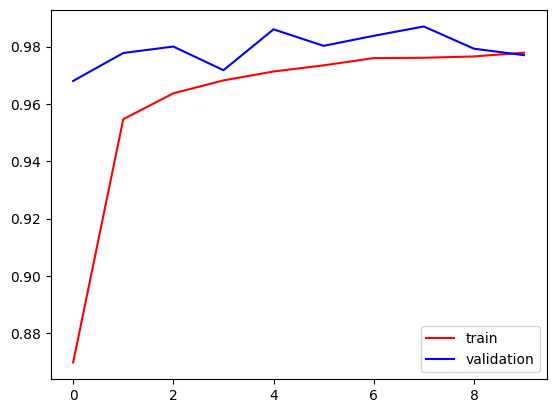

In [ ]:
plt.plot(history.history['accuracy'],color='red' , label = 'train')
plt.plot(history.history['val_accuracy'],color='blue' , label = 'validation')
plt.legend()
plt.show()

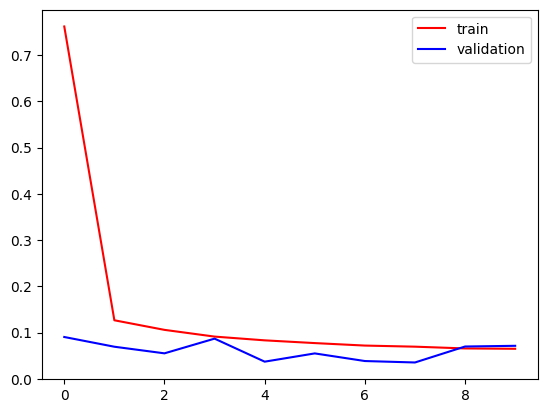

In [ ]:
plt.plot(history.history['loss'],color ='red' , label = 'train')
plt.plot(history.history['val_loss'],color ='blue' , label = 'validation')
plt.legend()
plt.show()

close to Zero  -->  Having a negative cracks

close to one -->   Having a positive crakcs

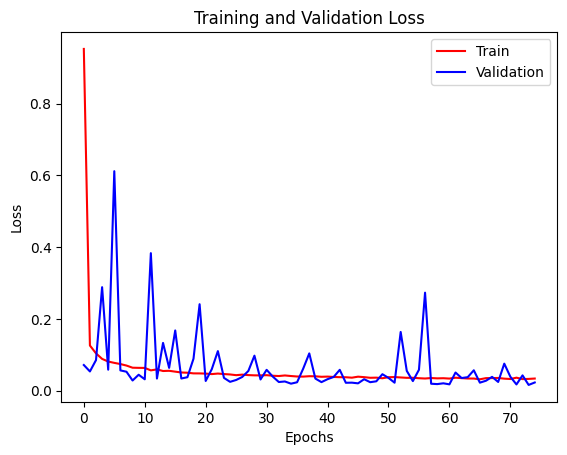

In [ ]:
import matplotlib.pyplot as plt

# Provided raw data
train_loss = [
    0.9529, 0.1257, 0.1038, 0.0884, 0.0810, 0.0773, 0.0740, 0.0698, 0.0638, 0.0634,
    0.0632, 0.0564, 0.0591, 0.0546, 0.0552, 0.0528, 0.0505, 0.0498, 0.0480, 0.0479,
    0.0474, 0.0460, 0.0475, 0.0461, 0.0450, 0.0430, 0.0445, 0.0432, 0.0425, 0.0424,
    0.0430, 0.0414, 0.0406, 0.0422, 0.0406, 0.0393, 0.0390, 0.0401, 0.0398, 0.0385,
    0.0390, 0.0380, 0.0374, 0.0372, 0.0360, 0.0388, 0.0375, 0.0357, 0.0361, 0.0344,
    0.0373, 0.0377, 0.0366, 0.0356, 0.0357, 0.0345, 0.0337, 0.0350, 0.0341, 0.0345,
    0.0335, 0.0359, 0.0348, 0.0337, 0.0336, 0.0315, 0.0347, 0.0349, 0.0352, 0.0333,
    0.0323, 0.0360, 0.0320, 0.0326, 0.0336
]

val_loss = [
    0.0713, 0.0534, 0.0851, 0.2884, 0.0583, 0.6119, 0.0563, 0.0526, 0.0281, 0.0442,
    0.0315, 0.3833, 0.0336, 0.1330, 0.0633, 0.1677, 0.0337, 0.0373, 0.0889, 0.2409,
    0.0268, 0.0597, 0.1101, 0.0354, 0.0244, 0.0296, 0.0380, 0.0547, 0.0974, 0.0310,
    0.0579, 0.0392, 0.0239, 0.0254, 0.0193, 0.0232, 0.0611, 0.1037, 0.0335, 0.0236,
    0.0318, 0.0380, 0.0579, 0.0218, 0.0221, 0.0202, 0.0317, 0.0234, 0.0259, 0.0457,
    0.0354, 0.0220, 0.1635, 0.0550, 0.0265, 0.0581, 0.2731, 0.0191, 0.0181, 0.0203,
    0.0174, 0.0504, 0.0350, 0.0374, 0.0566, 0.0221, 0.0275, 0.0383, 0.0241, 0.0751,
    0.0386, 0.0172, 0.0424, 0.0158, 0.0226
]

# Plotting the graph
plt.plot(train_loss, color='red', label='Train')
plt.plot(val_loss, color='blue', label='Validation')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


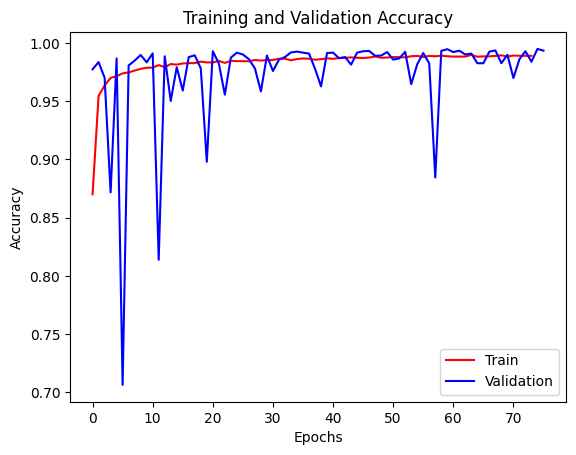

In [ ]:
import matplotlib.pyplot as plt

# Provided raw data
train_accuracy = [0.8701, 0.9547, 0.9636, 0.9701, 0.9716, 0.9740, 0.9748, 0.9764, 0.9779, 0.9788,
                  0.9790, 0.9811, 0.9793, 0.9820, 0.9815, 0.9825, 0.9828, 0.9828, 0.9841, 0.9834,
                  0.9834, 0.9847, 0.9830, 0.9848, 0.9845, 0.9845, 0.9844, 0.9855, 0.9850, 0.9854,
                  0.9855, 0.9866, 0.9866, 0.9852, 0.9863, 0.9868, 0.9866, 0.9857, 0.9862, 0.9869,
                  0.9865, 0.9872, 0.9874, 0.9877, 0.9874, 0.9872, 0.9876, 0.9885, 0.9874, 0.9876,
                  0.9880, 0.9879, 0.9878, 0.9887, 0.9890, 0.9881, 0.9890, 0.9887, 0.9892, 0.9887,
                  0.9884, 0.9884, 0.9884, 0.9899, 0.9883, 0.9886, 0.9886, 0.9890, 0.9895, 0.9885,
                  0.9893, 0.9891, 0.9891, 0.9891]

val_accuracy = [0.9775, 0.9837, 0.9703, 0.8717, 0.9868, 0.7063, 0.9808, 0.9850, 0.9898, 0.9835,
                0.9912, 0.8138, 0.9887, 0.9503, 0.9793, 0.9592, 0.9880, 0.9895, 0.9783, 0.8980,
                0.9930, 0.9825, 0.9557, 0.9875, 0.9918, 0.9902, 0.9862, 0.9783, 0.9585, 0.9893,
                0.9760, 0.9858, 0.9880, 0.9920, 0.9927, 0.9918, 0.9910, 0.9780, 0.9628, 0.9915,
                0.9918, 0.9870, 0.9880, 0.9815, 0.9918, 0.9930, 0.9933, 0.9890, 0.9893, 0.9923,
                0.9858, 0.9868, 0.9925, 0.9647, 0.9818, 0.9915, 0.9825, 0.8845, 0.9933, 0.9948,
                0.9923, 0.9935, 0.9902, 0.9910, 0.9827, 0.9827, 0.9927, 0.9937, 0.9827, 0.9900,
                0.9700, 0.9862, 0.9930, 0.9840, 0.9950, 0.9935]

# Plotting the graph
plt.plot(train_accuracy, color='red', label='Train')
plt.plot(val_accuracy, color='blue', label='Validation')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
import numpy as np
from google.colab import files
from keras.utils import load_img , img_to_array
from google.colab.patches import cv2_imshow
import cv2 as cv

In [ ]:
def countour_parameter(img):
  cr_g = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  b_cr_g = cv.GaussianBlur((cr_g),(3,3),cv.BORDER_DEFAULT)
  threshold , thresh= cv.threshold(b_cr_g , 100 , 255 ,cv.THRESH_BINARY)
  ithresh =cv.bitwise_not(thresh)
  cont,hierarchy=cv.findContours(ithresh , cv.RETR_EXTERNAL , cv.CHAIN_APPROX_SIMPLE)
  cra_crop = img.copy()
  cv.drawContours(cra_crop , cont , -1 , (0,225,0) , 1)
  #  return cra_cop
  cl = 0
  ca = 0
  contour_area = 0
  for con in cont:
    contour_length = cv.arcLength(con,closed = True)
    contour_area += cv.contourArea(con)
    cl = max(contour_length,cl)
    ca = max(contour_area,ca)
  a=0.02645833
  ca_cm =ca*a*a
  cl_cm =cl*a
  return cra_crop , ca_cm , cl_cm

Saving 02003.jpg to 02003 (15).jpg
Saving 02004.jpg to 02004 (4).jpg
Saving 02005.jpg to 02005 (1).jpg
Saving 02006.jpg to 02006 (1).jpg
/content/02003 (15).jpg


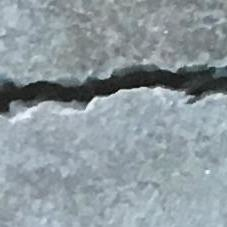

1/1 [==============================] - 0s 40ms/step
[1.]
02003 (15).jpgis a Positive


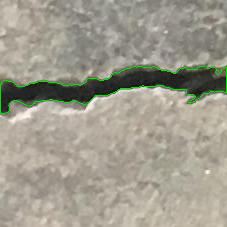

None 
lenght of crack =  8.081167106004617 cm 
Area of crack =  3.1750460532868554 cm
/content/02004 (4).jpg


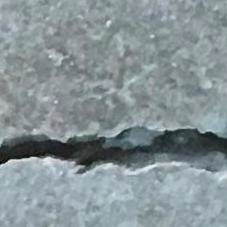

1/1 [==============================] - 0s 36ms/step
[0.9999999]
02004 (4).jpgis a Positive


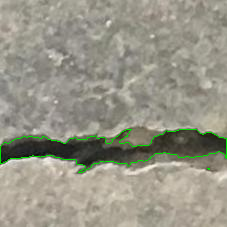

None 
lenght of crack =  8.279215143750735 cm 
Area of crack =  3.344106492459775 cm
/content/02005 (1).jpg


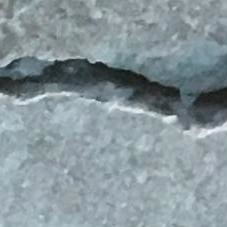

1/1 [==============================] - 0s 37ms/step
[0.9999528]
02005 (1).jpgis a Positive


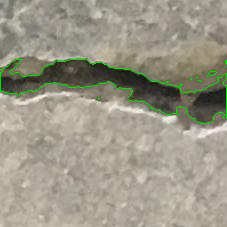

None 
lenght of crack =  9.334110263895408 cm 
Area of crack =  3.886639992911172 cm
/content/02006 (1).jpg


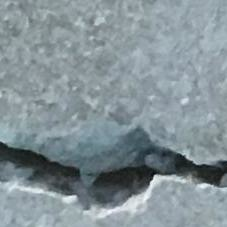

1/1 [==============================] - 0s 33ms/step
[0.99999094]
02006 (1).jpgis a Positive


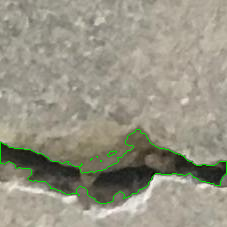

None 
lenght of crack =  8.951404630910469 cm 
Area of crack =  4.344818284582707 cm


In [ ]:
#################################################################################

uploaded = files.upload()
for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  print(path)
  img = load_img(path , target_size= (227,227))
  x = img_to_array(img)
  temp = x
  cv2_imshow(x) # Image is showing by this code.
  x = x/255.0
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images , batch_size = 10) # here we use model.predict.
  print(classes[0])
  # ii = cv.imread(path,0)
  # cv2_imshow(ii)
  if classes[0] > 0.5 :
    print(fn + "is a Positive")
    crack = cv.imread(path,1)
    crack = cv.resize(crack, (227,227))
    finali , area , leng = countour_parameter(crack)
    print(cv2_imshow(finali),"\nlenght of crack = ", leng/2,"cm",  "\nArea of crack = ", area, "cm")
    # cv2_imshow(temp)
  else:
    print(fn + "is a Negative")

In [ ]:
# import os
# import cv2 as cv
# from google.colab.patches import cv2_imshow
# # matplot , numpy done
# # !cp -r  "/content/drive/MyDrive/Colab Notebooks/Internship/Patches_Image" "/content/"


# test_folder = "/content/Patches_Image"
# newImagesArr = []
# for filename in os.listdir(test_folder):
#   image_path = os.path.join(test_folder,filename)
#   image = cv.imread(image_path)
#   image = cv.cvtColor(image,cv.COLOR_RGB2BGR)
#   #  blur
#   image = cv.medianBlur(image ,9)
#   # image = cv.GaussianBlur
#   # image = cv.resize()
#   image = image/255.0
#   newImagesArr.append(image)

# plt.imshow(newImagesArr[11])


# newImagesArr = np.array(newImagesArr)
# prediction = model.predict(newImagesArr)

# prediction.T


In [ ]:
# This is for delete the Patches_content Folder.
# !rm -r "/content/Patches_Image"

In [ ]:
# predictions = model.predict(images)
# import os
# import cv2 as cv
# from google.colab.patches import cv2_imshow
# # Create folders to save the images
# negative_folder = '/path/to/negative/folder'
# positive_folder = '/path/to/positive/folder'
# os.makedirs(negative_folder, exist_ok=True)
# os.makedirs(positive_folder, exist_ok=True)

# for i in range(len(predictions)):
#     predicted_class = np.argmax(predictions[i])
#     prediction_value = predictions[i][predicted_class]

#     if prediction_value > 0.5:
#         class_label = 'Negative'
#         save_folder = negative_folder
#     else:
#         class_label = 'Positive'
#         save_folder = positive_folder

#     image_path = os.path.join(save_folder, f"Image_{i+1}_{class_label}.jpg")
#     cv.imwrite(image_path, images[i])

#     print(f"Image {i+1}: Predicted class {predicted_class} ({class_label}) - Saved as {image_path}")
